In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:

import numpy as np

In [ ]:
## Dummy comment

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/15_window_train.csv")

In [ ]:
data.describe()

,Label
count,58389.000000
mean,0.255921
std,0.436382
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data1 = data.sample(frac=1, random_state=42)  # Randomly sample 50% of the data


In [ ]:
data1

,Seq,Label
26130,TKEDVKLKLEECSKR,0.0
4402,MYQLESGKLPRSPSF,1.0
48267,VTSTNAAKVFNLYPG,0.0
28895,LFVPVSSKFQKRKML,0.0
17112,RSPHRSHKKSKKNKH,0.0
...,...,...
54343,PLGRASSKASTPKPP,0.0
38158,LALLNWCKHNSKENH,0.0
860,DNKNSVLKFEQAQML,1.0
15795,PPLVDFLKDILRRYP,0.0


In [ ]:
X =  data1['Seq']
y = data1['Label']

In [ ]:

# Drop rows where y is NaN
X = X[~y.isna()]
y = y.dropna()


In [ ]:
# Count the occurrences of each label
label_counts = y.value_counts()

# Print the counts
print(f"Count of label 0: {label_counts.get(0, 0)}")
print(f"Count of label 1: {label_counts.get(1, 0)}")

Count of label 0: 43446
Count of label 1: 14943


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Assuming X is a pandas Series containing protein sequences and y is a pandas Series containing labels
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC features for each sequence in X_train and X_test
# Convert AAC features to numpy arrays for compatibility with machine learning models
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())

print("X_train_aac shape:", X_train_aac.shape)
print("y_train shape:", y_train.shape)
print("X_test_aac shape:", X_test_aac.shape)
print("y_test shape:", y_test.shape)

# Define fixed hyperparameters for SVM
svm_params = {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}

# Train SVM model with fixed parameters using GPU
svm_model = SVC(kernel=svm_params['kernel'], C=svm_params['C'], gamma=svm_params['gamma'])
svm_model.fit(X_train_aac, y_train)

# Evaluate the SVM model
svm_accuracy = evaluate_model(svm_model, X_test_aac, y_test)

# Print complete report for SVM
print("\nSVM Model Report:")
print(f"Parameters: {svm_params}")
print(f"Accuracy: {svm_accuracy}")


X_train_aac shape: (46711, 20)
y_train shape: (46711,)
X_test_aac shape: (11678, 20)
y_test shape: (11678,)

SVM Model Report:
Parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
Accuracy: 0.7048295941085803


## Multiple Models Combine

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Load your dataset
# data1 = pd.read_csv('path_to_your_dataset.csv')

# # Extract sequences and labels
# X = data1['Seq']
# y = data1['Label']

# # Count the occurrences of each label
# label_counts = y.value_counts()
# print(f"Count of label 0: {label_counts.get(0, 0)}")
# print(f"Count of label 1: {label_counts.get(1, 0)}")

# # Drop rows where y is NaN
# X = X[~y.isna()]
# y = y.dropna()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())

print("X_train_aac shape:", X_train_aac.shape)
print("y_train shape:", y_train.shape)
print("X_test_aac shape:", X_test_aac.shape)
print("y_test shape:", y_test.shape)

# Define the models and their parameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store model reports
model_reports = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_aac, y_train)
    accuracy = evaluate_model(model, X_test_aac, y_test)
    model_reports[model_name] = {
        'Parameters': model.get_params(),
        'Accuracy': accuracy
    }

# Print the model reports
for model_name, report in model_reports.items():
    print(f"\n{model_name} Model Report:")
    print(f"Parameters: {report['Parameters']}")
    print(f"Accuracy: {report['Accuracy']}")


X_train_aac shape: (46711, 20)
y_train shape: (46711,)
X_test_aac shape: (11678, 20)
y_test shape: (11678,)

Decision Tree Model Report:
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Accuracy: 0.738996403493749

Logistic Regression Model Report:
Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.743449220756979

Random Forest Model Report:
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_sample

<ipython-input-24-38ee3fe09b29>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df['Accuracy'], palette='viridis')


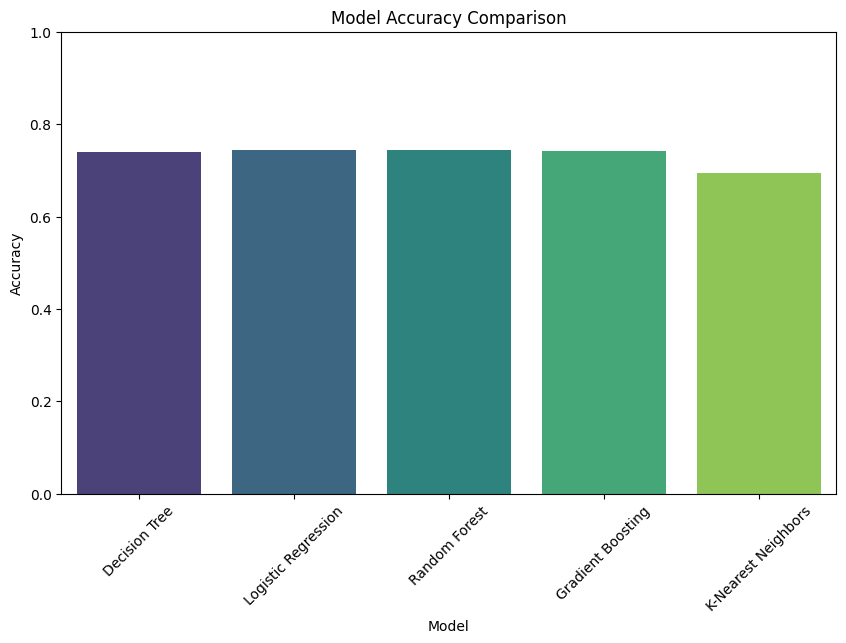


Model Report Table:
                     Accuracy
Decision Tree        0.738996
Logistic Regression  0.743449
Random Forest        0.744734
Gradient Boosting    0.742679
K-Nearest Neighbors  0.694211


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a DataFrame for the model reports
report_df = pd.DataFrame.from_dict(model_reports, orient='index')

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index, y=report_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Generate a table to show model reports
report_table = report_df.drop(columns='Parameters')
print("\nModel Report Table:")
print(report_table.to_string())

# Save the table to a CSV file
report_table.to_csv('model_report_table.csv', index=True)

#RF With DPC

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Assuming X is a pandas Series containing protein sequences and y is a pandas Series containing labels
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute DPC features for each sequence in X_train and X_test
X_train_dpc = np.array(X_train.apply(dpc_compute).tolist())
X_test_dpc = np.array(X_test.apply(dpc_compute).tolist())

print("X_train_dpc shape:", X_train_dpc.shape)
print("y_train shape:", y_train.shape)
print("X_test_dpc shape:", X_test_dpc.shape)
print("y_test shape:", y_test.shape)

# Define hyperparameters for Random Forest
rf_params = {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}

# Train Random Forest model with specified parameters using GPU
rf_model = RandomForestClassifier(n_estimators=rf_params['n_estimators'], max_depth=rf_params['max_depth'], random_state=rf_params['random_state'])
rf_model.fit(X_train_dpc, y_train)

# Evaluate the Random Forest model
rf_accuracy = evaluate_model(rf_model, X_test_dpc, y_test)

# Print complete report for Random Forest
print("\nRandom Forest Model Report using DPC Features only:")
print(f"Parameters: {rf_params}")
print(f"Accuracy: {rf_accuracy}")


X_train_dpc shape: (70112, 400)
y_train shape: (70112,)
X_test_dpc shape: (17528, 400)
y_test shape: (17528,)


ValueError: Input y contains NaN.

## RF WITH AAC + DPC Combine Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Assuming X is a pandas Series containing protein sequences and y is a pandas Series containing labels
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC and DPC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())
X_train_dpc = np.array(X_train.apply(dpc_compute).tolist())
X_test_dpc = np.array(X_test.apply(dpc_compute).tolist())

# Concatenate AAC and DPC features
X_train_combined = np.concatenate([X_train_aac, X_train_dpc], axis=1)
X_test_combined = np.concatenate([X_test_aac, X_test_dpc], axis=1)

print("X_train_combined shape:", X_train_combined.shape)
print("y_train shape:", y_train.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test shape:", y_test.shape)

# Define fixed hyperparameters for Random Forest
rf_params = {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}

# Train Random Forest model with fixed parameters using GPU
rf_model = RandomForestClassifier(n_estimators=rf_params['n_estimators'], max_depth=rf_params['max_depth'], random_state=rf_params['random_state'])
rf_model.fit(X_train_combined, y_train)

# Evaluate the Random Forest model
rf_accuracy = evaluate_model(rf_model, X_test_combined, y_test)

# Print complete report for Random Forest
print("\nRandom Forest Model Report:")
print(f"Parameters: {rf_params}")
print(f"Accuracy: {rf_accuracy}")


## KNN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Assuming X is a pandas Series containing protein sequences and y is a pandas Series containing labels
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC and DPC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())
X_train_dpc = np.array(X_train.apply(dpc_compute).tolist())
X_test_dpc = np.array(X_test.apply(dpc_compute).tolist())

# Concatenate AAC and DPC features
X_train_combined = np.concatenate([X_train_aac, X_train_dpc], axis=1)
X_test_combined = np.concatenate([X_test_aac, X_test_dpc], axis=1)

print("X_train_combined shape:", X_train_combined.shape)
print("y_train shape:", y_train.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test shape:", y_test.shape)

# Define hyperparameters for KNN
knn_params = {'n_neighbors': 5}

# Train KNN model with fixed parameters
knn_model = KNeighborsClassifier(n_neighbors=knn_params['n_neighbors'])
knn_model.fit(X_train_combined, y_train)

# Evaluate the KNN model
knn_accuracy = evaluate_model(knn_model, X_test_combined, y_test)

# Print complete report for KNN
print("\nK-Nearest Neighbors (KNN) Model Report:")
print(f"Parameters: {knn_params}")
print(f"Accuracy: {knn_accuracy}")


X_train_combined shape: (70112, 420)
y_train shape: (70112,)
X_test_combined shape: (17528, 420)
y_test shape: (17528,)


ValueError: Input y contains NaN.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Assuming X is a pandas Series containing protein sequences and y is a pandas Series containing labels
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC and DPC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())
X_train_dpc = np.array(X_train.apply(dpc_compute).tolist())
X_test_dpc = np.array(X_test.apply(dpc_compute).tolist())

# Concatenate AAC and DPC features
X_train_combined = np.concatenate([X_train_aac, X_train_dpc], axis=1)
X_test_combined = np.concatenate([X_test_aac, X_test_dpc], axis=1)

print("X_train_combined shape:", X_train_combined.shape)
print("y_train shape:", y_train.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test shape:", y_test.shape)

# Define hyperparameters for Gradient Boosting
gb_params = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'random_state': 42}

# Train Gradient Boosting model with specified parameters using GPU
gb_model = GradientBoostingClassifier(n_estimators=gb_params['n_estimators'], max_depth=gb_params['max_depth'], learning_rate=gb_params['learning_rate'], random_state=gb_params['random_state'])
gb_model.fit(X_train_combined, y_train)

# Evaluate the Gradient Boosting model
gb_accuracy = evaluate_model(gb_model, X_test_combined, y_test)

# Print complete report for Gradient Boosting
print("\nGradient Boosting Model Report:")
print(f"Parameters: {gb_params}")
print(f"Accuracy: {gb_accuracy}")


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from collections import Counter

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Assuming X is a pandas Series containing protein sequences and y is a pandas Series containing labels
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute AAC and DPC features for each sequence in X_train and X_test
X_train_aac = np.array(X_train.apply(aac_compute).tolist())
X_test_aac = np.array(X_test.apply(aac_compute).tolist())
X_train_dpc = np.array(X_train.apply(dpc_compute).tolist())
X_test_dpc = np.array(X_test.apply(dpc_compute).tolist())

# Concatenate AAC and DPC features
X_train_combined = np.concatenate([X_train_aac, X_train_dpc], axis=1)
X_test_combined = np.concatenate([X_test_aac, X_test_dpc], axis=1)

print("X_train_combined shape:", X_train_combined.shape)
print("y_train shape:", y_train.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test shape:", y_test.shape)

# Define hyperparameters for Logistic Regression
lr_params = {'penalty': 'l2', 'C': 1.0, 'random_state': 42}

# Train Logistic Regression model with specified parameters using GPU
lr_model = LogisticRegression(penalty=lr_params['penalty'], C=lr_params['C'], random_state=lr_params['random_state'])
lr_model.fit(X_train_combined, y_train)

# Evaluate the Logistic Regression model
lr_accuracy = evaluate_model(lr_model, X_test_combined, y_test)

# Print complete report for Logistic Regression
print("\nLogistic Regression Model Report:")
print(f"Parameters: {lr_params}")
print(f"Accuracy: {lr_accuracy}")
